In [1]:
# IMPORT LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ydata_profiling import ProfileReport

In [2]:
# LOAD DATA
df = pd.read_csv("../data/data.csv", encoding='ISO-8859-1')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# EXPLORE DATA
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# profile = ProfileReport(df, title="Automated EDA Report", explorative=True)
# profile.to_file("EDA_Report.html")

# print("\nAutomated profiling report saved as 'EDA_Report.html'")

In [5]:
# DATA CLEANING AND SAVING PROCESSED DATA

# a) Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# b) Remove negative quantities (optional: handle separately if you want cancellations)
df = df[df['Quantity'] > 0]

# c) Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# d) Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# e) Optional: Remove duplicate rows
df = df.drop_duplicates()

# Save cleaned data for dashboard
df.to_csv("../data/cleaned_data.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


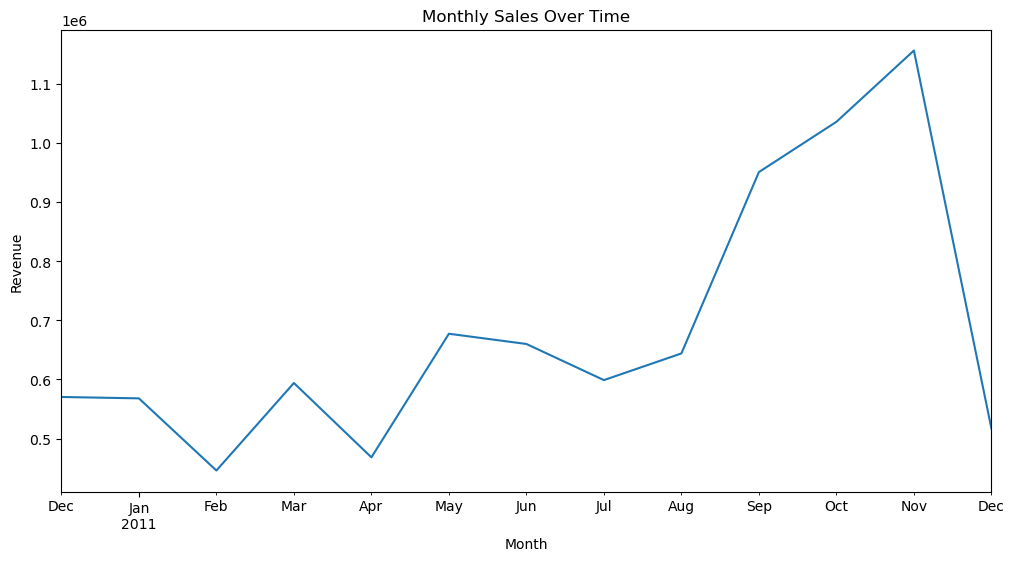

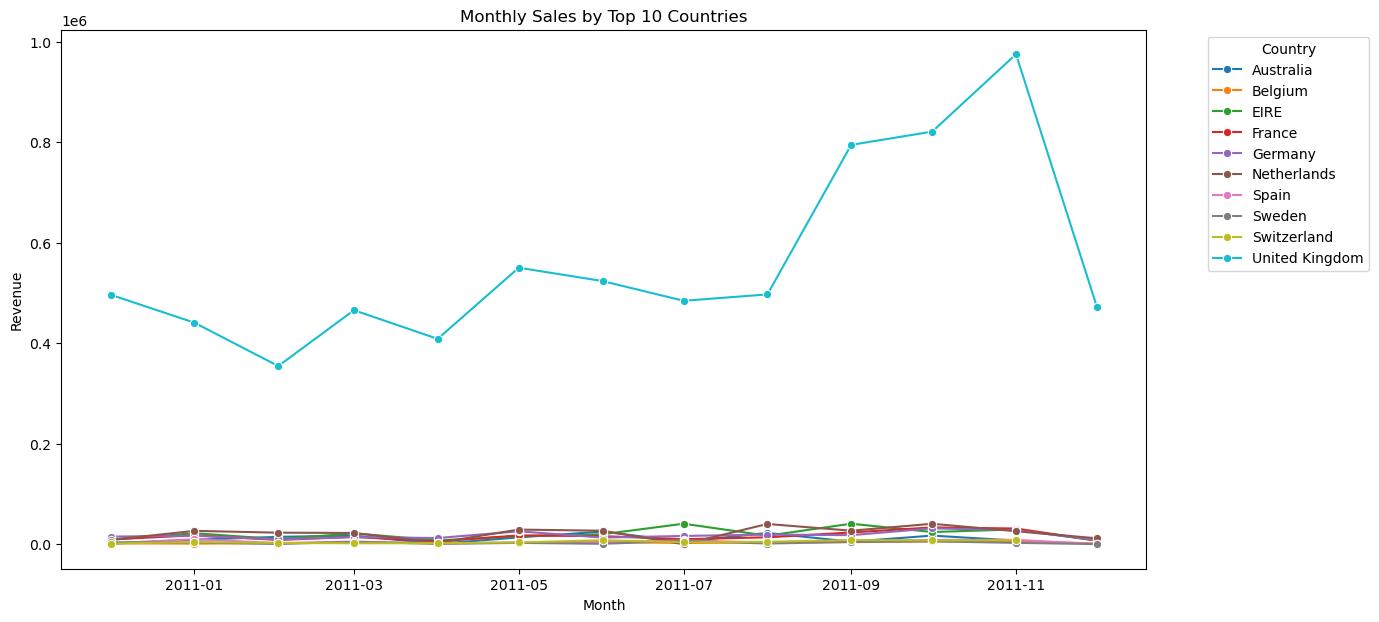

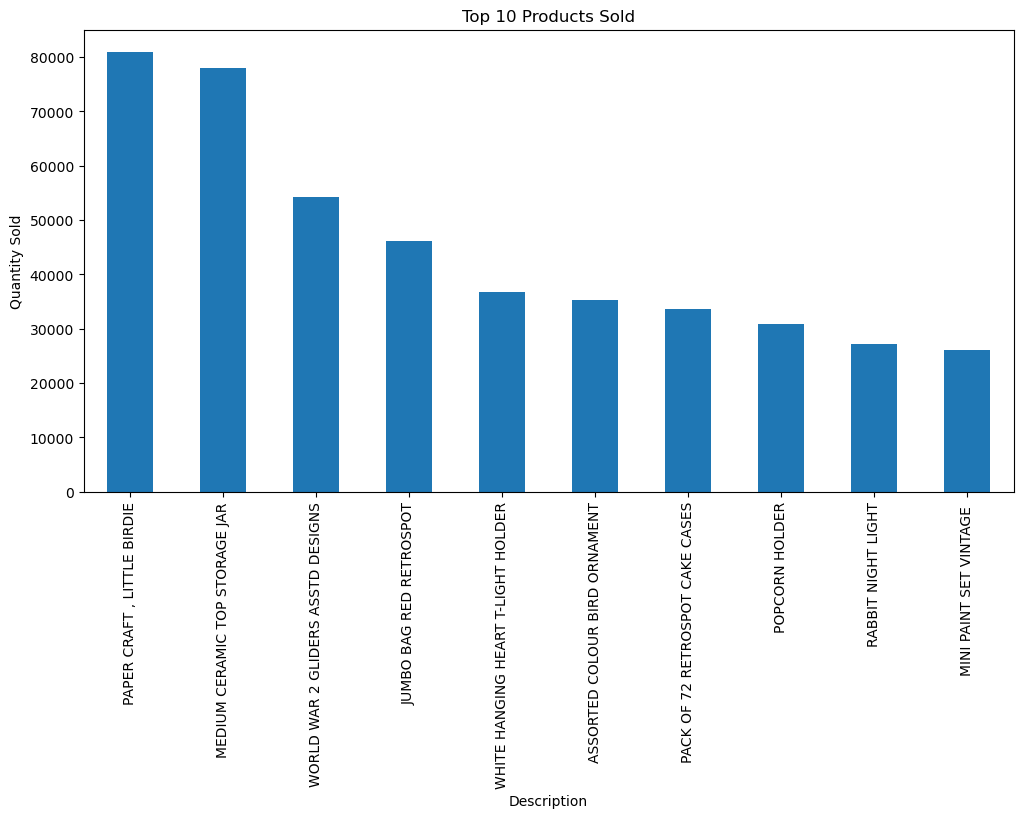

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: count, dtype: int64


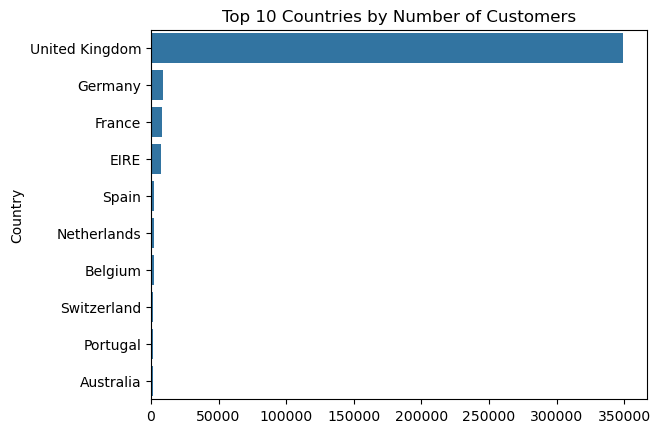

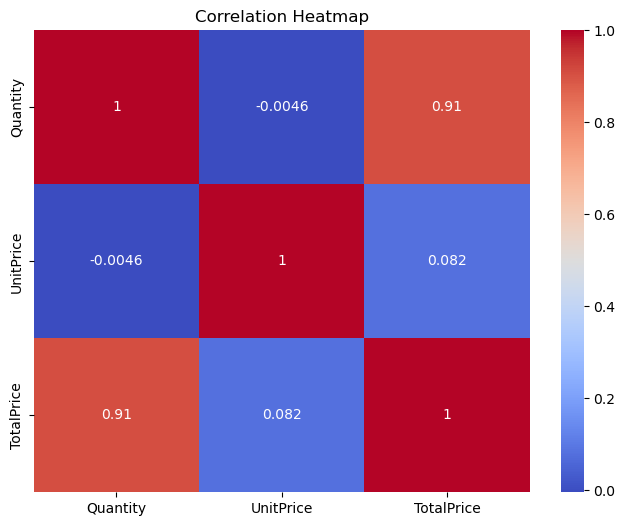

In [6]:
# EXPLORATORY DATA ANALYSIS (EDA) AND SAVE AGGREGATIONS

# a) Sales over time
sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
sales_over_time.plot(kind='line', figsize=(12,6), title='Monthly Sales')
plt.title('Monthly Sales Over Time')    
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Save sales over time
sales_over_time.to_csv("../data/sales_over_time.csv")

# a1) Sales by country over time
# 1. Calculate monthly sales by country
monthly_country_sales = df.groupby([df['InvoiceDate'].dt.to_period('M'), 'Country'])['TotalPrice'].sum().reset_index()
monthly_country_sales.rename(columns={'InvoiceDate':'Month', 'TotalPrice':'Revenue'}, inplace=True)

# 2. Convert 'Month' to datetime for proper plotting
monthly_country_sales['Month'] = monthly_country_sales['Month'].dt.to_timestamp()

# 3. Filter top 10 countries by total revenue
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).index
monthly_country_sales = monthly_country_sales[monthly_country_sales['Country'].isin(top_countries)]

# 4. Plot using Seaborn with hue
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_country_sales, x='Month', y='Revenue', hue='Country', marker='o')
plt.title('Monthly Sales by Top 10 Countries')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save monthly country sales
monthly_country_sales.to_csv("../data/monthly_country_sales.csv", index=False)

# b) Top products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12,6), title='Top 10 Products Sold')
plt.ylabel('Quantity Sold')
plt.show()

# Save top products
top_products.to_csv("../data/top_products.csv")

# c) Customers by country
country_counts = df['Country'].value_counts().head(10)
print(country_counts)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Customers')
plt.show()

# Save country counts
country_counts.to_csv("../data/country_counts.csv")

# d) Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity','UnitPrice','TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


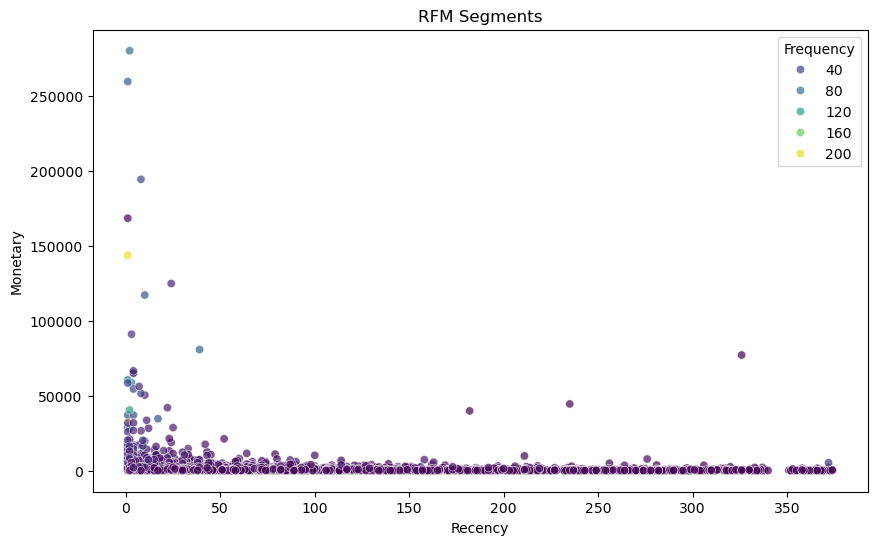

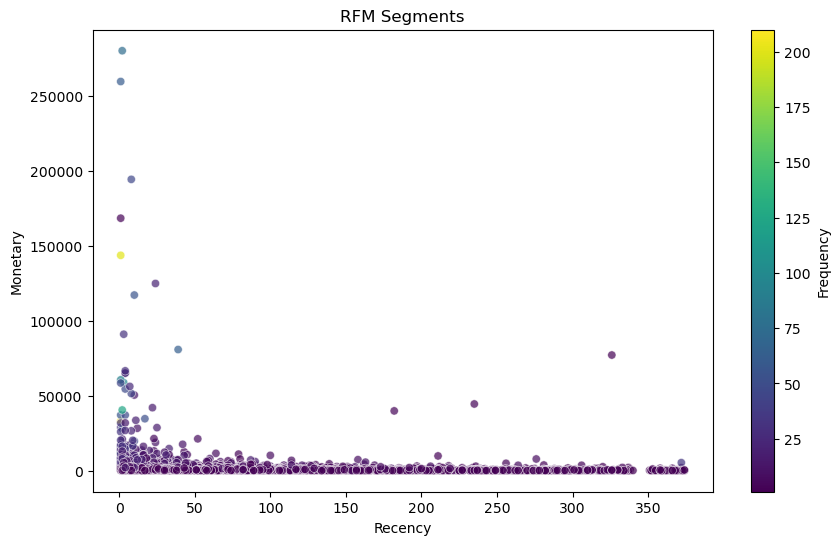

In [7]:
# RFM ANALYSIS (Customer Segmentation)

# a) Reference date (last invoice date + 1 day)
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)# days since last purchase

# b) Aggregate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'      # Monetary
})
rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'}, inplace=True)
print(rfm.head())

# c) RFM scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# d1) Visualize RFM segments (scatter)
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Frequency', palette='viridis', alpha=0.7)
plt.title('RFM Segments')
plt.show()

# d2) Visualize RFM segments (scatter) with colorbar to the side - alternative to d1

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Scatterplot on the specified axes
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Frequency',      # numeric continuous
    palette='viridis',    # gradient
    alpha=0.7,
    ax=ax,                # <-- specify axes
    legend=False
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=rfm['Frequency'].min(), vmax=rfm['Frequency'].max())
sm = mpl.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add the colorbar to the same axes
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Frequency')

ax.set_title('RFM Segments')
plt.show()




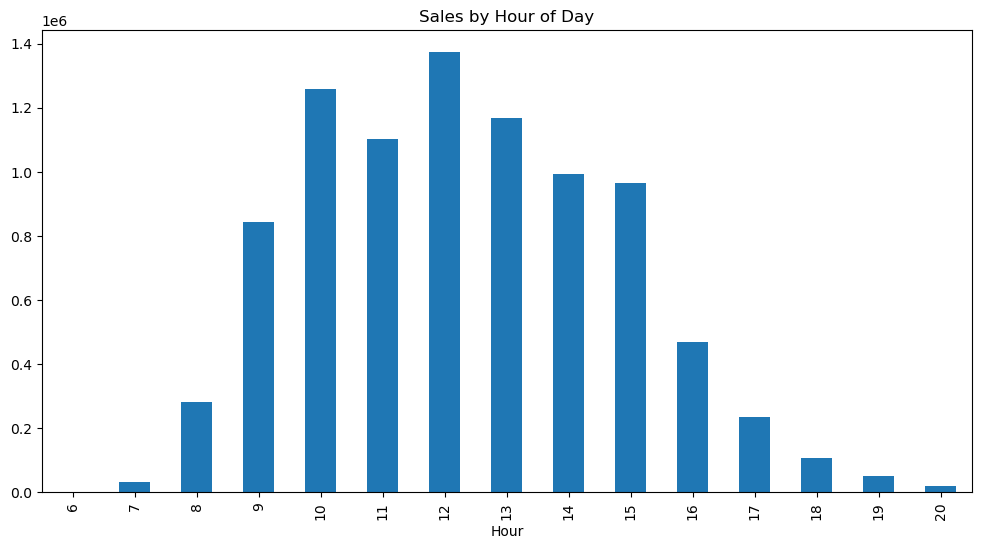

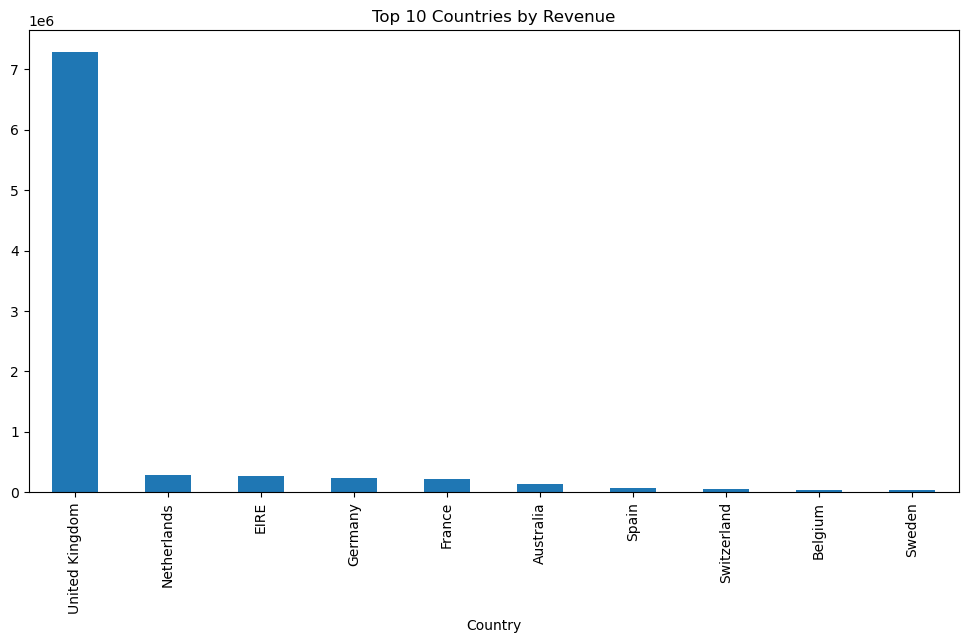

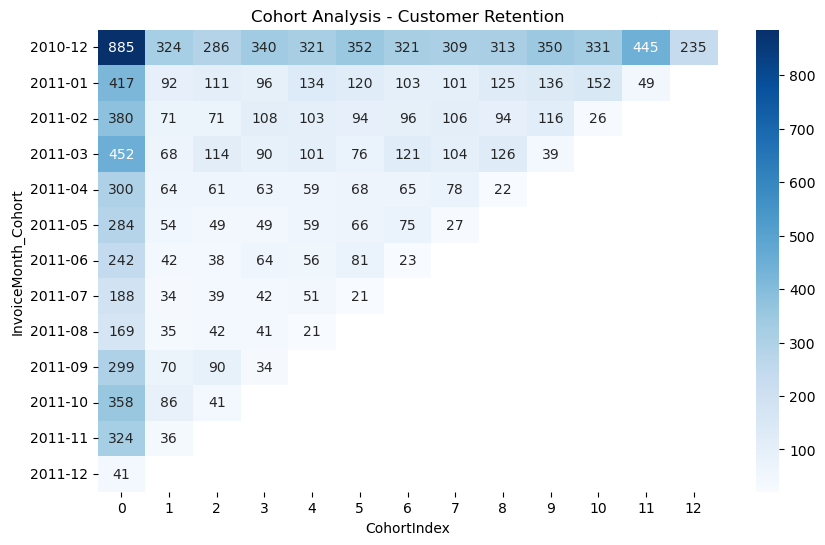

In [8]:
# ADVANCED ANALYSIS
from operator import attrgetter

# a) Time-of-day or day-of-week sales patterns
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
hourly_sales.plot(kind='bar', figsize=(12,6), title='Sales by Hour of Day')
plt.show()

# b) Country-wise revenue
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(12,6), title='Top 10 Countries by Revenue')
plt.show()

# c) Cohort analysis
# Assign each customer a cohort month (their first purchase month)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
first_purchase = df.groupby('CustomerID')['InvoiceMonth'].min()
df = df.join(first_purchase, on='CustomerID', rsuffix='_Cohort')

# Calculate how many months since first purchase
df['CohortIndex'] = (df['InvoiceMonth'] - df['InvoiceMonth_Cohort']).apply(attrgetter('n'))

# Cohort table: number of unique customers per cohort and month
cohort_data = df.groupby(['InvoiceMonth_Cohort', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot for visualization
cohort_pivot = cohort_data.pivot(index='InvoiceMonth_Cohort', columns='CohortIndex', values='CustomerID')

plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Cohort Analysis - Customer Retention')
plt.show()

In [9]:
# profile = ProfileReport(df, title="Automated EDA Report", explorative=True)
# profile.to_file("EDA_Report.html")

# print("\nAutomated profiling report saved as 'EDA_Report.html'")